# Introduction and background

"Europe is a large coffee market, accounting for about one-third of global consumption" (CBI.eu). The Netherlands is one of the largest consuming markets of coffee in Europe with an approximate of 5.6% of European consumption. Since COVID-19 the consumption of coffee have caused a sharp reduction in out-of-home coffee consumption, this has affected coffee shops that supply the out-of-home segment with high quality coffee(CBI.eu). 

Nevetheless, the demand for high quality coffee and café experiences shows no sign of dissapearing according to a study done in the UK last year, when the pandemic was at it's peak. 

The city of Amsterdam is one of the most visited and populated cities of The Netherlands. The city itself provides a lot of business opportunities and is a huge attractor of tourism. The market in Amsterdam is highly competitive, and a lot of new places have been business have been started in the past few years. 

I have always been a refined coffee drinker and absolutely love the taste of it. I am going to explore the opporunity to open up a new coffee-bar in Amsterdam city center. I think after the pandemic the demand for out-of-home coffee experiences will only generate more traffic, and this might be a very good time to start a new company. 

The project deals with discussing the neighborhood of Amsterdam, The Netherlands. I am going to identify the best place to open up a coffee shop in Amsterdam, with coffee shop we mean a place to drink coffee, and not a place to get softdrugs.


# Problem Description

My imaginary company (Amsterdam Aroma House) is targeting the city of Amsterdam to open up a new coffee bar. The new coffee bar is planning to be of high-quality, and is expected to compete with the large diverse portfolio of companies that supply coffee to the consumer. Consequently, we are not only looking at coffee-bars, for instance, we include sandwich bars, breakfast bars, bagel shops, and bakeries. The foremost reason for including these types of companies is because a high amount of sales come

The main problem that we have to resolve is to find the optimal location in the city of Amsterdam. As has been said, Amsterdam is a very popular city to start up a new company, especially in the vicinity of hospitality. We have to identify the optimal location by looking at population density, amount of competition, location, and types of companies that supply coffee.

So, in order to to decide on the location we have to include:

1. Population and demographics of Amsterdam, including density
2. The competition we may face in Amsterdam
3. Nearby venues like tourist attractions
4. Segmentation of the boroughs
5. Untapped locations
6. Saturated markets

# Data Used

The data that I used for the project and for preprocessing includes the following:

1. The importance of coffee:
https://www.cbi.eu/market-information/coffee/trade-statistics

2. Postal Codes of Amsterdam, found online from http://download.geonames.org/export/zip/
- This dataset includes the postal codes of all Dutch postal codes, and had to be cleaned and pre-processed.

3. Population of Amsterdam regarding geospatial data, including the likes of income, density and more:  https://opendata.cbs.nl/statline/#/CBS/nl/dataset/84286NED/table?ts=1558337871247

4. Foursquare API to generate venue information in the city of Amsterdam and process them using location clustering. By only generating venues related to "coffee", so we may include sandwich bars, donut shops etc.



# Methodology

Importing relevant datasets from the above sources and using the Foursquare API to generate and retrieve venues for Amsterdam city center. Afterwards, we have to preprocess the data, clean the data, do analysis on it by for instance K-means clustering, and generating a heatmap of population density and competition. 

We will determine the amount of companies that serve coffee to the general public and identify potential locations for our business. We analyze this through detemerining the demographics of the various boroughs together with the amount of competition. 

# Importing the postal codes of The Netherlands 

In [1]:
##!pip install bs4
##!pip install geopy
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests
import pandas as pd
import numpy as np # library to handle data in a vectorized manner
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

##!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

##!pip install folium
import folium

!pip install jupyterthemes

print('Libraries imported.')

Libraries imported.


In [2]:
df = pd.read_csv("Final Postal Codes.csv")

In [3]:
df.rename(columns={'Location':'Municipal', 'Municipal':'Province'}, inplace=True)

### Focussing the dataframe on Amsterdam only

In [4]:
# Making the amsterdam dataframe
df_amsterdam = df[df['Municipal'] == 'Amsterdam']

### Latitude and Longitude format has some errors, here we remove superfluous dots

In [5]:
#Removing the dots that we do not need
from string import ascii_letters

out = []
for x in df_amsterdam['Latitude']:
    x = x.rstrip(ascii_letters)
    spl = x.split(".")
    if len(spl) > 2:
        out.append(float("{}.{}".format(spl[0],"".join(spl[1:]))))
    else:
        out.append(float(x))
print(out)

[52.3778, 52.3774, 52.3768, 52.3764, 52.3759, 52.3757, 52.3754, 52.3746, 52.3688, 52.3742, 52.374, 52.3739, 52.3737, 52.3734, 52.3733, 52.3731, 52.373, 52.374, 52.3733, 52.3735, 52.3733, 52.3728, 52.3726, 52.3743, 52.3736, 52.3734, 52.3732, 52.3731, 52.373, 52.3729, 52.3727, 52.3726, 52.3751, 52.3746, 52.3742, 52.3739, 52.3734, 52.3732, 52.373, 52.3727, 52.3725, 52.3723, 52.3722, 52.3739, 52.3737, 52.3739, 52.3737, 52.3734, 52.373, 52.3734, 52.3732, 52.3729, 52.3727, 52.3725, 52.3722, 52.372, 52.3719, 52.3734, 52.3716, 52.3764, 52.3759, 52.3762, 52.3763, 52.3765, 52.3764, 52.376, 52.3717, 52.3729, 52.3726, 52.3722, 52.3717, 52.3726, 52.3725, 52.3758, 52.3753, 52.3749, 52.3743, 52.3737, 52.373, 52.3741, 52.3727, 52.3723, 52.3726, 52.3723, 52.3718, 52.3715, 52.3717, 52.3717, 52.3717, 52.3718, 52.3713, 52.3712, 52.3715, 52.3714, 52.3714, 52.3708, 52.3728, 52.3722, 52.3717, 52.3712, 52.3708, 52.3724, 52.3719, 52.3714, 52.3704, 52.3706, 52.371, 52.3709, 52.3707, 52.3708, 52.3705, 52.3706, 5

In [6]:
out1 = pd.DataFrame(out)

In [7]:
from string import ascii_letters

outlat = []
for x in df_amsterdam['Longitude']:
    x = x.rstrip(ascii_letters)
    spl = x.split(".")
    if len(spl) > 2:
        outlat.append(float("{}.{}".format(spl[0],"".join(spl[1:]))))
    else:
        outlat.append(float(x))
print(outlat)

[4.9057, 4.9082, 4.9047, 4.9094, 4.9029, 4.9029, 4.9028, 4.9039, 4.902, 4.9048, 4.9051, 4.9053, 4.9056, 4.9061, 4.9064, 4.9068, 4.907, 4.9044, 4.9057, 4.9057, 4.9054, 4.9069, 4.9066, 4.9037, 4.9044, 4.9048, 4.9051, 4.9054, 4.9056, 4.9057, 4.906, 4.9063, 4.9028, 4.9026, 4.9025, 4.9028, 4.9031, 4.9035, 4.9039, 4.9044, 4.9047, 4.905, 4.9052, 4.9022, 4.9026, 4.9019, 4.9024, 4.9026, 4.9029, 4.9021, 4.902, 4.9026, 4.9029, 4.9033, 4.9037, 4.904, 4.9043, 4.9027, 4.901, 4.9068, 4.9094, 4.9076, 4.9085, 4.906, 4.9075, 4.9074, 4.9015, 4.9018, 4.9024, 4.9032, 4.904, 4.904, 4.9037, 4.9026, 4.9024, 4.9021, 4.9018, 4.9015, 4.9012, 4.9022, 4.9014, 4.9021, 4.9013, 4.9018, 4.903, 4.9035, 4.903, 4.9036, 4.9034, 4.9016, 4.9028, 4.9027, 4.903, 4.9018, 4.9014, 4.9018, 4.9017, 4.9028, 4.9026, 4.9022, 4.9015, 4.9025, 4.9022, 4.9019, 4.9013, 4.9009, 4.9006, 4.8995, 4.9001, 4.8993, 4.9002, 4.8993, 4.899, 4.8988, 4.8996, 4.8998, 4.8993, 4.8993, 4.8989, 4.8983, 4.8977, 4.8984, 4.898, 4.8972, 4.8992, 4.8989, 4.9011

In [8]:
out2 = pd.DataFrame(outlat)

### Assigning the corrected latitude and longitude to the dataframe

In [9]:
#Setting two new columns, namely New longitude and latitude in correct formats
df_amsterdam['New Latitude'] = out1.set_index(df_amsterdam.index)
df_amsterdam['New Longitude'] = out2.set_index(df_amsterdam.index)
                    

<ipython-input-9-4ae39cd6c7b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['New Latitude'] = out1.set_index(df_amsterdam.index)
<ipython-input-9-4ae39cd6c7b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amsterdam['New Longitude'] = out2.set_index(df_amsterdam.index)


In [10]:
df_amsterdam.head()

Landcode Postal Code  Municipal       Province Latitude Longitude  \
217315       NL     1011 AB  Amsterdam  Noord-Holland  52.3778    4.9057   
217316       NL     1011 AC  Amsterdam  Noord-Holland  52.3774    4.9082   
217317       NL     1011 AD  Amsterdam  Noord-Holland  52.3768    4.9047   
217318       NL     1011 AE  Amsterdam  Noord-Holland  52.3764    4.9094   
217319       NL     1011 AG  Amsterdam  Noord-Holland  52.3759    4.9029   

        New Latitude  New Longitude  
217315       52.3778         4.9057  
217316       52.3774         4.9082  
217317       52.3768         4.9047  
217318       52.3764         4.9094  
217319       52.3759         4.9029

### Dropping columns that we do not need

In [11]:
df_amsterdam.drop(['Landcode','Municipal','Province','Latitude','Longitude'], axis='columns', inplace=True)

C:\Users\Gebruiker\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Renaming the columns

In [12]:
df_amsterdam.rename(columns={'New Latitude':'Latitude', 'New Longitude':'Longitude'}, inplace=True)

C:\Users\Gebruiker\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Taking only a sample of 500 for our Foursquare analysis

In [13]:
df_amsterdam1 = df_amsterdam.head(500)
df_amsterdam1.shape

(500, 3)

In [14]:
neighborhood_latitude = 52.373
neighborhood_longitude = 4.893

### Creating the map of Amsterdam city center

In [15]:
# creating map of Amsterdam, which goes by longitude and latitude
map_amsterdam = folium.Map(location=[52.37, 4.90], zoom_start =15)

#adding markers to the map
for lat, lng, Postal_Code in zip(df_amsterdam1['Latitude'], df_amsterdam1['Longitude'], df_amsterdam1['Postal Code']):
    label = '{}'.format(Postal_Code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_amsterdam)  
    
map_amsterdam

# Exploring the neighborhoods with more details

In [16]:
# Reading a csv with the details of neighborhoods in Amsterdam, this has been made before by someone else
df_ams = pd.read_csv('Amsterdam_population.csv')
df_ams.head()

Districts and neighborhoods Districts and neighborhoods copy Municipality  \
0                   Amsterdam                        Amsterdam    Amsterdam   
1       Burgwallen-Oude Zijde            Burgwallen-Oude Zijde    Amsterdam   
2             Burgwallen East                  Burgwallen East    Amsterdam   
3     Burgwallen-Nieuwe Zijde          Burgwallen-Nieuwe Zijde    Amsterdam   
4           Nieuwendijk North                Nieuwendijk North    Amsterdam   

  Population Population density Number of income recipients  \
0    854 047              5 160                     672 500   
1      4 305             12 323                       3 700   
2      1 590             25 530                       1 300   
3      3 930              6 881                       3 400   
4        450              8 207                         400   

  Average income per income recipient Average income per inhabitant  \
0                                36.4                          29.6   
1                                35.1                          31.7   
2                                   .                             .   
3                                38.9                          34.8   
4                                   .                             .   

  40% persons with the lowest income 20% persons with the highest income  \
0                               39.8                                23.8   
1                               38.2                                24.4   
2                               41.4                                20.9   
3                               33.9                                27.6   
4                               36.7                                26.8   

  Active 15-75 years 40% households with the lowest income  \
0               62.8                                  51.8   
1               72.7                                  59.2   
2               70.7                                  62.1   
3               75.4                                  56.8   
4               74.2                                  61.3   

  20% households with the highest income low income housholds  \
0                                   16.9                 13.7   
1                                   11.9                 15.0   
2                                    9.9                 15.3   
3                                   13.4                 12.9   
4                                   14.1                 15.1   

  below or around the social minimum Most common zip code Coverage percentage  \
0                               13.0                    .                   .   
1                               14.3                    .                   .   
2                               15.3                 1012                   1   
3                               11.5                    .                   .   
4                               13.5                 1012                   1   

   Longitude   Latitude  
0   4.893604  52.372760  
1   4.896103  52.371946  
2   4.896103  52.371946  
3   4.889922  52.373706  
4   4.896242  52.377567

In [17]:
# dropping possible nan values
df_ams = df_ams.dropna(subset = ["Population density"], inplace=False)

# selecting empty line postal codes
index_to_drop = df_ams[(df_ams["Population density"] == '.')].index
# deleting these row indexes from data frame
df_ams.drop(index_to_drop, inplace=True)

In [18]:
#Checking to see if there are any NaN values left in any columns
df_ams.isnull().sum()

Districts and neighborhoods               0
Districts and neighborhoods copy          0
Municipality                              0
Population                                0
Population density                        0
Number of income recipients               0
Average income per income recipient       0
Average income per inhabitant             0
40% persons with the lowest income        0
20% persons with the highest income       0
Active 15-75 years                        0
40% households with the lowest income     0
20% households with the highest income    0
low income housholds                      0
below or around the social minimum        0
Most common zip code                      0
Coverage percentage                       0
Longitude                                 0
Latitude                                  0
dtype: int64

## Map of the neighborhood districts

In [19]:
# create map of Amsterdam using latitude and longitude values
map_ams = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=12)

# add markers to map
for lat, lng, dist in zip(df_ams['Latitude'], df_ams['Longitude'], df_ams['Districts and neighborhoods']):
#     print(lat, lng)
    label = '{}'.format(dist)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ams)  
    
map_ams

## Heatmap based on population density of Amsterdam for postal codes

In [20]:
#Creating a heatmap for Amsterdam with population density, to see where we might can start a coffee-shop
def generateBaseMap(default_location=[neighborhood_latitude, neighborhood_longitude], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map


from folium.plugins import HeatMap
df_copy = df_ams.copy()
df_copy['count'] = 1

base_map = generateBaseMap()

# add markers to map
for lat, lng, dist in zip(df_ams['Latitude'], df_ams['Longitude'], df_ams['Districts and neighborhoods']):
#     print(lat, lng)
    label = '{}'.format(dist)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#7b3b3a',
        fill_opacity=0.7,
        parse_html=False).add_to(base_map)  

HeatMap(data=df_copy[['Latitude', 'Longitude', 'count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=15, max_zoom=12).add_to(base_map)

#Heat map of concentration of population density.
base_map

# Providing a more thorough vision with circle size of neighborhoods

In [21]:
# create map of Amsterdam using latitude and longitude values, bigger circles means bigger density
map_ams = folium.Map(location=[52.37, 4.90], zoom_start=14)


# add markers to map
for lat, lng, pop, dist in zip(df_ams['Latitude'], df_ams['Longitude'], df_ams['Population density'], df_ams['Districts and neighborhoods']):

    label = '{},{}'.format(dist,  pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=float(pop.replace(" ", ""))/1500.,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.25,
        parse_html=False).add_to(map_ams)  
    
map_ams

## Assigning float values to classify high dense neighborhoods

In [22]:
df_ams['Population density'] = df_ams['Population density'].str.replace(' ', '').astype(float)

In [23]:
df_ams['Population density'].max()

29133.0

In [24]:
#Converting the string to a float to use with maths.
##df_ams['Population density'] =df_ams['Population density'].apply(lambda x: float(x))

In [25]:
#Picking only the 20 largest population dense neighborhoods of Amsterdam
df20 = df_ams.nlargest(20,['Population density'])

In [26]:
#Assigning means to total dataframe and top 20 dataframe
dfmean = df_ams['Population density'].mean()
dfmean20 = df20['Population density'].mean()

In [27]:
df_ams.head()


Districts and neighborhoods Districts and neighborhoods copy Municipality  \
0                   Amsterdam                        Amsterdam    Amsterdam   
1       Burgwallen-Oude Zijde            Burgwallen-Oude Zijde    Amsterdam   
2             Burgwallen East                  Burgwallen East    Amsterdam   
3     Burgwallen-Nieuwe Zijde          Burgwallen-Nieuwe Zijde    Amsterdam   
4           Nieuwendijk North                Nieuwendijk North    Amsterdam   

  Population  Population density Number of income recipients  \
0    854 047              5160.0                     672 500   
1      4 305             12323.0                       3 700   
2      1 590             25530.0                       1 300   
3      3 930              6881.0                       3 400   
4        450              8207.0                         400   

  Average income per income recipient Average income per inhabitant  \
0                                36.4                          29.6   
1                                35.1                          31.7   
2                                   .                             .   
3                                38.9                          34.8   
4                                   .                             .   

  40% persons with the lowest income 20% persons with the highest income  \
0                               39.8                                23.8   
1                               38.2                                24.4   
2                               41.4                                20.9   
3                               33.9                                27.6   
4                               36.7                                26.8   

  Active 15-75 years 40% households with the lowest income  \
0               62.8                                  51.8   
1               72.7                                  59.2   
2               70.7                                  62.1   
3               75.4                                  56.8   
4               74.2                                  61.3   

  20% households with the highest income low income housholds  \
0                                   16.9                 13.7   
1                                   11.9                 15.0   
2                                    9.9                 15.3   
3                                   13.4                 12.9   
4                                   14.1                 15.1   

  below or around the social minimum Most common zip code Coverage percentage  \
0                               13.0                    .                   .   
1                               14.3                    .                   .   
2                               15.3                 1012                   1   
3                               11.5                    .                   .   
4                               13.5                 1012                   1   

   Longitude   Latitude  
0   4.893604  52.372760  
1   4.896103  52.371946  
2   4.896103  52.371946  
3   4.889922  52.373706  
4   4.896242  52.377567

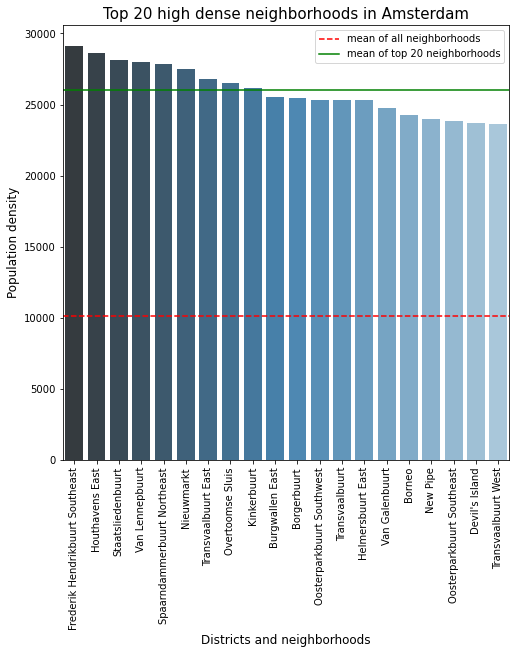

In [28]:
#Amount of different categories visualized
plt.figure(figsize=(8,8))
plt.title("Top 20 high dense neighborhoods in Amsterdam", fontsize =15 )
ax = sns.barplot(x='Districts and neighborhoods', y='Population density', data=df20, palette='Blues_d')
ax.axhline(dfmean, color='r', label='mean of all neighborhoods', linestyle='--')
ax.axhline(dfmean20, color='g', label='mean of top 20 neighborhoods')
ax.set_xlabel('Districts and neighborhoods', fontsize=12)
ax.set_ylabel('Population density', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation =90)
ax.legend()


plt.show()

# Assigning Foursquare Credentials

In [29]:
CLIENT_ID = 'VKR54HRKBNCML12T2HFVIVZTPE52M30MUBYYOPRJPLU5ORRY' # your Foursquare ID
CLIENT_SECRET = 'YB51HCRXIX5WS2Y5LNEHUKRMHQ41CVB5R0UWS35DVHR1P23G' # your Foursquare Secret
ACCESS_TOKEN = 'E2BXLEWJTTBPKOUUYR0VBDMFKP23IJDSQOB0KUNL3NKQBXD1' # your FourSquare Access Token
VERSION = '20200605'
LIMIT = 100
radius = 500
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: VKR54HRKBNCML12T2HFVIVZTPE52M30MUBYYOPRJPLU5ORRY
CLIENT_SECRET:YB51HCRXIX5WS2Y5LNEHUKRMHQ41CVB5R0UWS35DVHR1P23G


In [30]:
neighborhood_latitude = 52.373
neighborhood_longitude = 4.893

In [31]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            neighborhood_latitude, 
            neighborhood_longitude, 
            radius, 
            LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=VKR54HRKBNCML12T2HFVIVZTPE52M30MUBYYOPRJPLU5ORRY&client_secret=YB51HCRXIX5WS2Y5LNEHUKRMHQ41CVB5R0UWS35DVHR1P23G&v=20200605&ll=52.373,4.893&radius=500&limit=100'

In [32]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '607fc914d9abe514b2ad4c8b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Stadsdeel Centrum',
  'headerFullLocation': 'Stadsdeel Centrum, Amsterdam',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 72,
  'suggestedBounds': {'ne': {'lat': 52.3775000045, 'lng': 4.900357029830034},
   'sw': {'lat': 52.368499995499995, 'lng': 4.8856429701699655}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a270329f964a5209b841fe3',
       'name': 'Proeflokaal De Drie Fleschjes',
       'location': {'address': 'Gravenstraat 18',
        'lat': 52.374202693253054,
        'lng': 4.89223921638973,
        'labeledLatLngs': [{'label': 'display',

In [33]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [34]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-34-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


name         categories        lat       lng
0  Proeflokaal De Drie Fleschjes                Bar  52.374203  4.892239
1                      Scheltema          Bookstore  52.372205  4.893175
2                 Wynand Fockink       Liquor Store  52.372301  4.895253
3                            Dam              Plaza  52.373005  4.892929
4            Kaagman & Kortekaas  French Restaurant  52.374878  4.892455

In [35]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


72 venues were returned by Foursquare.


In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for  name, lat, lng in zip(names, latitudes, longitudes):
        print( name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
           # make the GET request 
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            print("An exception occurred" , name)
            continue
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue Id' ,
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
##Amsterdam_venues_details = getNearbyVenues(names=df_amsterdam1['Postal Code'], latitudes=df_amsterdam1['Latitude'],longitudes=df_amsterdam1['Longitude']  )

In [38]:
# In case we need it in the future I saved the above table into a csv.
##Amsterdam_venues_details.to_csv(r'C:\Users\Gebruiker\Desktop\projects\Coursera_Capstone\Amsterdam_venue_details.csv')

In [40]:
#Importing the csv file we just created in case we start a new project.
Amsterdam_venues_details = pd.read_csv("Amsterdam_venue_details.csv")

## Venues allocated to our latiude and longitudes by Foursquare

In [41]:
Amsterdam_venues_details.head(20)

Unnamed: 0 Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0            0      1011 AB                52.3778                  4.9057   
1            1      1011 AB                52.3778                  4.9057   
2            2      1011 AB                52.3778                  4.9057   
3            3      1011 AB                52.3778                  4.9057   
4            4      1011 AB                52.3778                  4.9057   
5            5      1011 AB                52.3778                  4.9057   
6            6      1011 AB                52.3778                  4.9057   
7            7      1011 AB                52.3778                  4.9057   
8            8      1011 AB                52.3778                  4.9057   
9            9      1011 AB                52.3778                  4.9057   
10          10      1011 AB                52.3778                  4.9057   
11          11      1011 AB                52.3778                  4.9057   
12          12      1011 AB                52.3778                  4.9057   
13          13      1011 AB                52.3778                  4.9057   
14          14      1011 AB                52.3778                  4.9057   
15          15      1011 AB                52.3778                  4.9057   
16          16      1011 AB                52.3778                  4.9057   
17          17      1011 AB                52.3778                  4.9057   
18          18      1011 AB                52.3778                  4.9057   
19          19      1011 AB                52.3778                  4.9057   

                    Venue Id                                            Venue  \
0   55674fe7498e0a4781b0f3d8                                            Choux   
1   4de6588a18389f0558772bbf                              SkyLounge Amsterdam   
2   57eae091cd109c066803b935                      Eric Vökel Amsterdam Suites   
3   59ee3e0ead17895f06e16ca1                                  Grand Cafe 1884   
4   4d10aee19302a35d46867c6e  DoubleTree by Hilton Amsterdam Centraal Station   
5   59a7e57c112c6c25cc1cccb2                                        Trainmore   
6   4c9a3de0eaa5a1437b97cae4                                    Mauro Mansion   
7   4b599470f964a520698d28e3                                          Vermeer   
8   4c29c5d39eb1952133ca2959                               Restaurant Lastage   
9   4c208145e923ef3bf0ef4e54  Basiliek van de Heilige Nicolaas (Nicolaaskerk)   
10  555e1db6498ec84f80c514ce                                         Eastwood   
11  4a27003df964a520cc821fe3                                  Het Elfde Gebod   
12  50056329e4b0c7e958812543                                        Starbucks   
13  4a688ba1f964a52088ca1fe3                       Station Amsterdam Centraal   
14  586a6209000bef215b1db525                                     Saigon Càphê   
15  4a270341f964a520e5841fe3                         Molly Malone's Irish Pub   
16  55c10ee5498ecb81fe809f9d                            Omelegg - City Centre   
17  585bfff5375c4a72ef02fb11                                  Little Delirium   
18  4de65a82d4c09fc98b7cd41c                                        Lobby Bar   
19  4a317303f964a520d2991fe3                                      De Klimmuur   

    Venue Latitude  Venue Longitude         Venue Category  
0        52.377693         4.907260             Restaurant  
1        52.376860         4.905160              Hotel Bar  
2        52.377750         4.906943        Vacation Rental  
3        52.377894         4.905133             Restaurant  
4        52.376835         4.904956                  Hotel  
5        52.376262         4.906586   Gym / Fitness Center  
6        52.375898         4.902315                  Hotel  
7        52.376669         4.900454      French Restaurant  
8        52.375512         4.902227      French Restaurant  
9        52.376669         4.900950                 C

In [42]:
# Analyzing how many duplicates we have
import collections
collections.Counter(Amsterdam_venues_details['Venue'])

Counter({'Choux': 42,
         'SkyLounge Amsterdam': 114,
         'Eric Vökel Amsterdam Suites': 45,
         'Grand Cafe 1884': 68,
         'DoubleTree by Hilton Amsterdam Centraal Station': 120,
         'Trainmore': 106,
         'Mauro Mansion': 207,
         'Vermeer': 162,
         'Restaurant Lastage': 223,
         'Basiliek van de Heilige Nicolaas (Nicolaaskerk)': 168,
         'Eastwood': 32,
         'Het Elfde Gebod': 188,
         'Starbucks': 308,
         'Station Amsterdam Centraal': 62,
         'Saigon Càphê': 40,
         "Molly Malone's Irish Pub": 36,
         'Omelegg - City Centre': 193,
         'Little Delirium': 31,
         'Lobby Bar': 14,
         'De Klimmuur': 14,
         'MoJo Japanese Kitchen': 15,
         'Chocolate Company': 70,
         'Hannekes Boom': 23,
         'Coffeecompany': 302,
         'Loetje Centraal': 117,
         'In de Olofspoort': 172,
         'Mary Go Wild': 252,
         'Startpunt Dam tot Damloop': 23,
         "Café 't Man

In [43]:
# Removing duplicates and attaching it to a new dataset
Amsterdam_venue_details2  = Amsterdam_venues_details.drop_duplicates(['Venue','Venue Latitude','Venue Longitude'], keep = 'last')
Amsterdam_venue_details2.head(5)


Unnamed: 0 Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
67            67      1011 AB                52.3778                  4.9057   
69            69      1011 AB                52.3778                  4.9057   
113          113      1011 AC                52.3774                  4.9082   
3125        3125      1011 DE                52.3759                  4.9094   
3164        3164      1011 DE                52.3759                  4.9094   

                      Venue Id                       Venue  Venue Latitude  \
67    5b56fd62a35dce002c900d4c          Pancakes Amsterdam       52.380608   
69    57b08fd9498e38d616269e1a          MR. Sister Foodbar       52.380560   
113   4bc325fd920eb713b6011d2c  Al Ponte - Caffe' Italiano       52.381828   
3125  4ec7cde26da1d1092ef19c27        Ipo's Coffee Gallery       52.377475   
3164  4ae81d49f964a52015ae21e3                     SUBWAY®       52.377557   

      Venue Longitude  Venue Category  
67           4.900039  Breakfast Spot  
69           4.899982            Café  
113          4.908205     Coffee Shop  
3125         4.915910     Coffee Shop  
3164         4.916086  Sandwich Place

In [44]:
#Checking to see there are now only unique values
print('there are {} unique venues.'.format(len(Amsterdam_venue_details2['Venue Longitude'].unique())))

there are 578 unique venues.


In [45]:
collections.Counter(Amsterdam_venue_details2['Venue Category'])

Counter({'Breakfast Spot': 9,
         'Café': 26,
         'Coffee Shop': 30,
         'Sandwich Place': 13,
         'Jazz Club': 1,
         'Concert Hall': 2,
         'Supermarket': 3,
         'Bar': 32,
         'Hotel': 38,
         'Lounge': 3,
         'Cheese Shop': 7,
         'Greek Restaurant': 3,
         'Butcher': 1,
         "Men's Store": 1,
         'Marijuana Dispensary': 18,
         'French Restaurant': 16,
         'Lebanese Restaurant': 2,
         'Yoga Studio': 1,
         'Restaurant': 26,
         'Bagel Shop': 3,
         'Cosmetics Shop': 6,
         'Bowling Alley': 1,
         'Boat or Ferry': 4,
         'Zoo': 1,
         'Italian Restaurant': 13,
         'Harbor / Marina': 2,
         'Hostel': 5,
         'Bed & Breakfast': 2,
         'Beer Bar': 6,
         'Zoo Exhibit': 5,
         'Cocktail Bar': 9,
         'Plaza': 8,
         'Science Museum': 3,
         'Pizza Place': 5,
         'Japanese Restaurant': 4,
         'Art Gallery': 3,
      

In [46]:
#Since we want to open up a coffee store I select the most important direct and indirect competiton
Amsterdam_coffee = Amsterdam_venue_details2[(Amsterdam_venue_details2['Venue Category'] =='Café') | (Amsterdam_venue_details2['Venue Category']
                                                                                  =='Coffee Shop') | 
                         (Amsterdam_venue_details2['Venue Category'] =='Bakery') |
                         (Amsterdam_venue_details2['Venue Category'] =='Bagel Shop') |
                         (Amsterdam_venue_details2['Venue Category'] =='Sandwich Place') |
                         (Amsterdam_venue_details2['Venue Category'] =='Breakfast Spot') |
                         (Amsterdam_venue_details2['Venue Category'] == 'Bar')]
                          
                                                   
                        

#Café and Coffee shops are the direct competition, while other categories can indirectly compete with us like bars.
# Bars often have lunch menu's too and serve coffee to the guests.


In [47]:
collections.Counter(Amsterdam_coffee['Venue Category'])

Counter({'Breakfast Spot': 9,
         'Café': 26,
         'Coffee Shop': 30,
         'Sandwich Place': 13,
         'Bar': 32,
         'Bagel Shop': 3,
         'Bakery': 6})

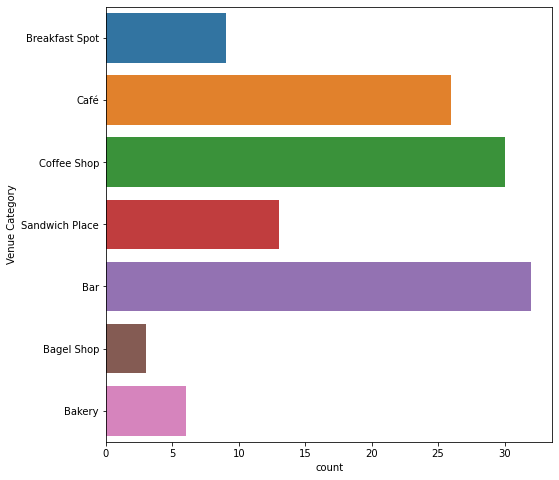

In [48]:
#Amount of different categories visualized
plt.figure(figsize=(8,8))
sns.countplot(y='Venue Category', data=Amsterdam_coffee)

plt.show()

In [49]:
Amsterdam_coffee.head(10)

Unnamed: 0 Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
67             67      1011 AB                52.3778                  4.9057   
69             69      1011 AB                52.3778                  4.9057   
113           113      1011 AC                52.3774                  4.9082   
3125         3125      1011 DE                52.3759                  4.9094   
3164         3164      1011 DE                52.3759                  4.9094   
3499         3499      1011 DL                52.3760                  4.9074   
3513         3513      1011 DL                52.3760                  4.9074   
14212       14212      1011 RX                52.3678                  4.9072   
14335       14335      1011 RZ                52.3681                  4.9076   
15799       15799      1011 TM                52.3713                  4.9099   

                       Venue Id                       Venue  Venue Latitude  \
67     5b56fd62a35dce002c900d4c          Pancakes Amsterdam       52.380608   
69     57b08fd9498e38d616269e1a          MR. Sister Foodbar       52.380560   
113    4bc325fd920eb713b6011d2c  Al Ponte - Caffe' Italiano       52.381828   
3125   4ec7cde26da1d1092ef19c27        Ipo's Coffee Gallery       52.377475   
3164   4ae81d49f964a52015ae21e3                     SUBWAY®       52.377557   
3499   4a7ac63cf964a5207ae91fe3                   Zouthaven       52.378307   
3513   4a27000cf964a52006821fe3                Captein & Co       52.373614   
14212  4bd58edecfa7b71369ef25da                 Lunchroom T       52.363899   
14335  5124b2ffe4b09ac38ea39ef7              Bagels & Beans       52.364047   
15799  4a27002ff964a52095821fe3                 Café Pollux       52.374436   

       Venue Longitude  Venue Category  
67            4.900039  Breakfast Spot  
69            4.899982            Café  
113           4.908205     Coffee Shop  
3125          4.915910     Coffee Shop  
3164          4.916086  Sandwich Place  
3499          4.912592             Bar  
3513          4.902944             Bar  
14212         4.910835  Sandwich Place  
14335         4.910781      Bagel Shop  
15799         4.904938             Bar

In [50]:
# Initializing the map object
base_map = generateBaseMap()


HeatMap(data=df_copy[['Latitude', 'Longitude', 'count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=15, max_zoom=14).add_to(base_map)

# adding Coffee Shops onto the map:

# add pop-up text to each marker on the map
latitudes = list(Amsterdam_coffee['Venue Latitude'])
longitudes = list(Amsterdam_coffee['Venue Longitude'])
labels = list(Amsterdam_coffee['Venue Category'])

print(len(latitudes), len(longitudes), len(labels))

for lat, lng, label in zip(latitudes, longitudes, labels):
#     print(lat, lng)
    folium.Marker([lat, lng], icon=folium.Icon(color='blue', icon='coffee', prefix='fa'), popup=label).add_to(base_map)


base_map

119 119 119


In [51]:
# Adding a circle area of 100meter around the different locations of companies that serve coffee.
base_map = generateBaseMap(default_zoom_start = 13)

#Making clusters based on the neighborhoods
inc = folium.plugins.MarkerCluster().add_to(base_map)

# add markers to map
for lat, lng, pop, hood in zip(df_ams['Latitude'], df_ams['Longitude'], df_ams['Population density'], df_ams['Districts and neighborhoods']):
#     print(lat, lng)
    label= '{},{}'.format(pop, hood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= pop/1500.,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#7b3b3a',
        fill_opacity=0.3,
        parse_html=False).add_to(inc) 

HeatMap(data=df_copy[['Latitude', 'Longitude', 'count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=15, max_zoom=12).add_to(base_map)

# add pop-up text to each marker on the map
latitudes = list(Amsterdam_coffee['Venue Latitude'])
longitudes = list(Amsterdam_coffee['Venue Longitude'])
labels = list(Amsterdam_coffee['Venue Category'])


for lat, lng, label in zip(latitudes, longitudes, labels):
#     print(lat, lng)
    folium.Marker([lat, lng], popup=label, icon=folium.Icon(color='red', icon='coffee', prefix='fa')).add_to(base_map)

    # add a grey circle to represent the search radius
    folium.Circle([lat, lng], radius=100, color='#004B7F', opacity=0.7, fill = True, fill_opacity=0.7).add_to(base_map)

base_map

# Map based on top 20 dense neighborhoods

In [52]:
# Adding a circle area of 100meter around the different locations of companies that serve coffee.
base_map = generateBaseMap(default_zoom_start = 13)

#Making clusters based on the neighborhoods
inc = folium.plugins.MarkerCluster().add_to(base_map)

# add markers of top 20 dense neighborhoods
for lat, lng, pop, hood in zip(df20['Latitude'], df20['Longitude'], df20['Population density'], df20['Districts and neighborhoods']):
#     print(lat, lng)
    label= '{},{}'.format(pop, hood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=pop/1500.,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#7b3b3a',
        fill_opacity=1,
        parse_html=False).add_to(inc) 


# add pop-up text to each marker on the map
latitudes = list(Amsterdam_coffee['Venue Latitude'])
longitudes = list(Amsterdam_coffee['Venue Longitude'])
labels = list(Amsterdam_coffee['Venue Category'])


for lat, lng, label in zip(latitudes, longitudes, labels):
#     print(lat, lng)
    folium.Marker([lat, lng], popup=label, icon=folium.Icon(color='red', icon='coffee', prefix='fa')).add_to(base_map)

    # add a grey circle to represent the search radius
    folium.Circle([lat, lng], radius=100, color='#004B7F', opacity=0.7, fill = True, fill_opacity=0.7).add_to(base_map)

base_map

#Only two of the top neighborhoods are in the radius we want to place our coffee shop (city center)

In [53]:
df_ams

Districts and neighborhoods Districts and neighborhoods copy  \
0                          Amsterdam                        Amsterdam   
1              Burgwallen-Oude Zijde            Burgwallen-Oude Zijde   
2                    Burgwallen East                  Burgwallen East   
3            Burgwallen-Nieuwe Zijde          Burgwallen-Nieuwe Zijde   
4                  Nieuwendijk North                Nieuwendijk North   
5                   Spuistraat North                 Spuistraat North   
6                   Spuistraat South                 Spuistraat South   
7                     Beguinage area                   Beguinage area   
8                      Calf triangle                    Calf triangle   
9                Grachtengordel-West              Grachtengordel-West   
10                Leidsegracht North               Leidsegracht North   
11                       Golden Bend                      Golden Bend   
12                Leidsegracht South               Leidsegracht South   
13              Nieuwmarkt / Lastage             Nieuwmarkt / Lastage   
14                  Oosterdokseiland                 Oosterdokseiland   
15                         Rapenburg                        Rapenburg   
16                           Lastage                          Lastage   
17                        Nieuwmarkt                       Nieuwmarkt   
18                         Uilenburg                        Uilenburg   
19                        Valkenburg                       Valkenburg   
20                   Haarlemmerbuurt                  Haarlemmerbuurt   
21                  Westerdok Island                 Westerdok Island   
22              Haarlemmerbuurt East             Haarlemmerbuurt East   
23              Haarlemmerbuurt West             Haarlemmerbuurt West   
24               Planciusbuurt North              Planciusbuurt North   
25               Planciusbuurt South              Planciusbuurt South   
26                            Jordan                           Jordan   
27                The Weteringschans               The Weteringschans   
28                     Weteringbuurt                    Weteringbuurt   
29           Weesperbuurt / Plantage          Weesperbuurt / Plantage   
30                      Weesperbuurt                     Weesperbuurt   
31                        Plantation                       Plantation   
32                        Kattenburg                       Kattenburg   
33                        Wittenburg                       Wittenburg   
34                        Oostenburg                       Oostenburg   
35                  Czaar Peterbuurt                 Czaar Peterbuurt   
36                         The Funen                        The Funen   
37                          Kadijken                         Kadijken   
38                 Western Docklands                Western Docklands   
39                   Westhaven North                  Westhaven North   
41                      Amerikahaven                     Amerikahaven   
43                   Westhaven South                  Westhaven South   
44          Sloterdijk business park         Sloterdijk business park   
45                     Sloterdijk II                    Sloterdijk II   
47               Sloterdijk III West              Sloterdijk III West   
48                        De Heining                       De Heining   
49                          Teleport                         Teleport   
52                        Houthavens                       Houthavens   
53                   Houthavens West                  Houthavens West   
54                   Houthavens East                  Houthavens East   
55                    Zeeheldenbuurt                   Zeeheldenbuurt   
56       Spaarndammerbuurt Northeast      Spaarndammerbuurt Northeast   
57       Spaarndammerbuurt Southeast      Spaarndammerbuurt Southeast   
58       Spaarndammerbuurt Southwest      Spaarndammerbuurt Southwe

# One hot encoding

In [54]:
#one hot encoding
Amsterdam_coffee_onehot  = pd.get_dummies(Amsterdam_coffee[['Venue Category']], prefix = '', prefix_sep='')

#adding the neighbourhoud(postal code into the dataframe)
Amsterdam_coffee_onehot['Neighborhood'] = Amsterdam_coffee['Neighborhood']

#Moving neighborhood to the first column
fixed_columns = [Amsterdam_coffee_onehot.columns[-1]] + list(Amsterdam_coffee_onehot.columns[:-1])
Amsterdam_coffee_onehot = Amsterdam_coffee_onehot[fixed_columns]

Amsterdam_coffee_onehot.head()


Neighborhood  Bagel Shop  Bakery  Bar  Breakfast Spot  Café  Coffee Shop  \
67        1011 AB           0       0    0               1     0            0   
69        1011 AB           0       0    0               0     1            0   
113       1011 AC           0       0    0               0     0            1   
3125      1011 DE           0       0    0               0     0            1   
3164      1011 DE           0       0    0               0     0            0   

      Sandwich Place  
67                 0  
69                 0  
113                0  
3125               0  
3164               1

In [55]:
Amsterdam_coffee_onehot.shape

(119, 8)

In [56]:
#Grouping the onehot category we just made by neighborhood to see which place is reigning there.
Amsterdam_coffee_grouped = Amsterdam_coffee_onehot.groupby('Neighborhood').mean().reset_index()
Amsterdam_coffee_grouped

Neighborhood  Bagel Shop    Bakery       Bar  Breakfast Spot      Café  \
0       1011 AB    0.000000  0.000000  0.000000        0.500000  0.500000   
1       1011 AC    0.000000  0.000000  0.000000        0.000000  0.000000   
2       1011 DE    0.000000  0.000000  0.000000        0.000000  0.000000   
3       1011 DL    0.000000  0.000000  1.000000        0.000000  0.000000   
4       1011 RX    0.000000  0.000000  0.000000        0.000000  0.000000   
5       1011 RZ    1.000000  0.000000  0.000000        0.000000  0.000000   
6       1011 TM    0.000000  0.000000  1.000000        0.000000  0.000000   
7       1011 VM    0.000000  0.090909  0.363636        0.181818  0.181818   
8       1011 VP    0.000000  0.000000  0.000000        0.000000  1.000000   
9       1011 VS    0.111111  0.000000  0.222222        0.000000  0.333333   
10      1011 VT    0.000000  0.000000  0.400000        0.200000  0.200000   
11      1011 VW    0.000000  0.000000  0.333333        0.000000  0.333333   
12      1011 VZ    0.000000  0.000000  0.000000        0.333333  0.000000   
13      1012 AA    0.000000  0.000000  0.333333        0.000000  0.333333   
14      1012 BJ    0.000000  1.000000  0.000000        0.000000  0.000000   
15      1012 CX    0.000000  0.000000  1.000000        0.000000  0.000000   
16      1012 DM    0.000000  0.000000  0.000000        0.000000  0.000000   
17      1012 EG    0.000000  0.000000  0.000000        0.000000  0.000000   
18      1012 EH    0.000000  0.000000  0.000000        0.000000  0.000000   
19      1012 EK    0.000000  0.000000  0.000000        0.000000  1.000000   
20      1012 EZ    0.000000  0.000000  0.000000        0.000000  0.000000   
21      1012 GD    0.000000  0.000000  0.000000        0.000000  0.000000   
22      1012 GE    0.000000  0.000000  0.000000        0.000000  1.000000   
23      1012 GL    1.000000  0.000000  0.000000        0.000000  0.000000   
24      1012 GN    0.000000  0.000000  0.000000        0.000000  0.000000   
25      1012 GP    0.000000  0.000000  0.000000        0.000000  0.000000   
26      1012 HV    0.000000  0.000000  1.000000        0.000000  0.000000   
27      1012 JZ    0.000000  0.000000  0.250000        0.000000  0.000000   
28      1012 LD    0.000000  0.000000  0.333333        0.333333  0.333333   
29      1012 LE    0.000000  0.083333  0.166667        0.166667  0.166667   
30      1012 LV    0.000000  0.125000  0.250000        0.000000  0.250000   
31      1012 LX    0.000000  0.000000  0.357143        0.000000  0.357143   
32      1012 LZ    0.000000  0.100000  0.300000        0.050000  0.200000   

    Coffee Shop  Sandwich Place  
0      0.000000        0.000000  
1      1.000000        0.000000  
2      0.500000        0.500000  
3      0.000000        0.000000  
4      0.000000        1.000000  
5      0.000000        0.000000  
6      0.000000        0.000000  
7      0.181818        0.000000  
8      0.000000        0.000000  
9      0.222222        0.111111  
10     0.200000        0.000000  
11     0.333333        0.000000  
12     0.333333        0.333333  
13     0.333333        0.000000  
14     0.000000        0.000000  
15     0.000000        0.000000  
16     1.000000        0.000000  
17     1.000000        0.000000  
18     1.000000        0.000000  
19     0.000000        0.000000  
20     1.000000        0.000000  
21     1.000000        0.000000  
22     0.000000        0.000000  
23     0.000000        0.000000  
24     1.000000        0.000000  
25     1.000000        0.000000  
26     0.000000        0.000000  
27     0.500000        0.250000  
28     0.000000        0.000000  
29     0.000000        0.416667  
30     0.250000        0.125000  
31     0.285714        0.000000  
32     0.250000        0.100000

In [57]:
Amsterdam_coffee_grouped.shape

(33, 8)

In [58]:
#Assigning the highest scoring venues to the neighborhood.
num_top_venues = 20

for hood in Amsterdam_coffee_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Amsterdam_coffee_grouped[Amsterdam_coffee_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----1011 AB----
            venue  freq
0  Breakfast Spot   0.5
1            Café   0.5
2      Bagel Shop   0.0
3          Bakery   0.0
4             Bar   0.0
5     Coffee Shop   0.0
6  Sandwich Place   0.0


----1011 AC----
            venue  freq
0     Coffee Shop   1.0
1      Bagel Shop   0.0
2          Bakery   0.0
3             Bar   0.0
4  Breakfast Spot   0.0
5            Café   0.0
6  Sandwich Place   0.0


----1011 DE----
            venue  freq
0     Coffee Shop   0.5
1  Sandwich Place   0.5
2      Bagel Shop   0.0
3          Bakery   0.0
4             Bar   0.0
5  Breakfast Spot   0.0
6            Café   0.0


----1011 DL----
            venue  freq
0             Bar   1.0
1      Bagel Shop   0.0
2          Bakery   0.0
3  Breakfast Spot   0.0
4            Café   0.0
5     Coffee Shop   0.0
6  Sandwich Place   0.0


----1011 RX----
            venue  freq
0  Sandwich Place   1.0
1      Bagel Shop   0.0
2          Bakery   0.0
3             Bar   0.0
4  Breakfast Spot   0.0


In [59]:
#Defining
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
#Assigning the num top venues to the postal codes.
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Amsterdam_coffee_grouped['Neighborhood']

for ind in np.arange(Amsterdam_coffee_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Amsterdam_coffee_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0      1011 AB                  Café        Breakfast Spot   
1      1011 AC           Coffee Shop        Sandwich Place   
2      1011 DE        Sandwich Place           Coffee Shop   
3      1011 DL                   Bar        Sandwich Place   
4      1011 RX        Sandwich Place           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Sandwich Place           Coffee Shop                   Bar   
1                  Café        Breakfast Spot                   Bar   
2                  Café        Breakfast Spot                   Bar   
3           Coffee Shop                  Café        Breakfast Spot   
4                  Café        Breakfast Spot                   Bar   

  6th Most Common Venue 7th Most Common Venue  
0                Bakery            Bagel Shop  
1                Bakery            Bagel Shop  
2                Bakery            Bagel Shop  
3                Bakery            Bagel Shop  
4                Bakery            Bagel Shop

In [61]:
neighborhoods_venues_sorted.shape

(33, 8)

In [62]:
neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       1011 AB                  Café        Breakfast Spot   
1       1011 AC           Coffee Shop        Sandwich Place   
2       1011 DE        Sandwich Place           Coffee Shop   
3       1011 DL                   Bar        Sandwich Place   
4       1011 RX        Sandwich Place           Coffee Shop   
5       1011 RZ            Bagel Shop        Sandwich Place   
6       1011 TM                   Bar        Sandwich Place   
7       1011 VM                   Bar           Coffee Shop   
8       1011 VP                  Café        Sandwich Place   
9       1011 VS                  Café           Coffee Shop   
10      1011 VT                   Bar           Coffee Shop   
11      1011 VW           Coffee Shop                  Café   
12      1011 VZ        Sandwich Place           Coffee Shop   
13      1012 AA           Coffee Shop                  Café   
14      1012 BJ                Bakery        Sandwich Place   
15      1012 CX                   Bar        Sandwich Place   
16      1012 DM           Coffee Shop        Sandwich Place   
17      1012 EG           Coffee Shop        Sandwich Place   
18      1012 EH           Coffee Shop        Sandwich Place   
19      1012 EK                  Café        Sandwich Place   
20      1012 EZ           Coffee Shop        Sandwich Place   
21      1012 GD           Coffee Shop        Sandwich Place   
22      1012 GE                  Café        Sandwich Place   
23      1012 GL            Bagel Shop        Sandwich Place   
24      1012 GN           Coffee Shop        Sandwich Place   
25      1012 GP           Coffee Shop        Sandwich Place   
26      1012 HV                   Bar        Sandwich Place   
27      1012 JZ           Coffee Shop        Sandwich Place   
28      1012 LD                  Café        Breakfast Spot   
29      1012 LE        Sandwich Place                  Café   
30      1012 LV           Coffee Shop                  Café   
31      1012 LX                  Café                   Bar   
32      1012 LZ                   Bar           Coffee Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0         Sandwich Place           Coffee Shop                   Bar   
1                   Café        Breakfast Spot                   Bar   
2                   Café        Breakfast Spot                   Bar   
3            Coffee Shop                  Café        Breakfast Spot   
4                   Café        Breakfast Spot                   Bar   
5            Coffee Shop                  Café        Breakfast Spot   
6            Coffee Shop                  Café        Breakfast Spot   
7                   Café        Breakfast Spot                Bakery   
8            Coffee Shop        Breakfast Spot                   Bar   
9                    Bar        Sandwich Place            Bagel Shop   
10                  Café        Breakfast Spot        Sandwich Place   
11                   Bar        Sandwich Place        Breakfast Spot   
12        Breakfast Spot                  Café                   Bar   
13                   Bar        Sandwich Place        Breakfast Spot   
14           Coffee Shop                  Café        Breakfast Spot   
15           Coffee Shop                  Café        Breakfast Spot   
16                  Café        Breakfast Spot                   Bar   
17                  Café        Breakfast Spot                   Bar   
18                  Café        Breakfast Spot                   Bar   
19           Coffee Shop        Breakfast Spot                   Bar   
20                  Café        Breakfast Spot                   Bar   
21                  Café        Breakfast Spot                   Bar   
22           Coffee Shop        Breakfast Spot                   Bar   
23           Coffee Shop                  Café        Breakfast Spot   
24                  Café        Breakfast Spot              

In [63]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 29

Amsterdam_grouped_clustering = Amsterdam_coffee_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Amsterdam_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:29] 

<ipython-input-63-0db0d9b5c920>:8: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (29). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Amsterdam_grouped_clustering)


array([10, 26,  8, 21,  7,  5, 21,  4, 23, 28, 19,  6, 11,  6,  3, 21, 26,
       26, 26, 23, 26, 26, 23,  5, 26, 26, 21, 12, 14])

In [64]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Amsterdam_merged = df_amsterdam1

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Amsterdam_merged = Amsterdam_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Postal Code')

Amsterdam_merged.head() # check the last columns!

Postal Code  Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
217315     1011 AB   52.3778     4.9057            10.0                  Café   
217316     1011 AC   52.3774     4.9082            26.0           Coffee Shop   
217317     1011 AD   52.3768     4.9047             NaN                   NaN   
217318     1011 AE   52.3764     4.9094             NaN                   NaN   
217319     1011 AG   52.3759     4.9029             NaN                   NaN   

       2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
217315        Breakfast Spot        Sandwich Place           Coffee Shop   
217316        Sandwich Place                  Café        Breakfast Spot   
217317                   NaN                   NaN                   NaN   
217318                   NaN                   NaN                   NaN   
217319                   NaN                   NaN                   NaN   

       5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  
217315                   Bar                Bakery            Bagel Shop  
217316                   Bar                Bakery            Bagel Shop  
217317                   NaN                   NaN                   NaN  
217318                   NaN                   NaN                   NaN  
217319                   NaN                   NaN                   NaN

In [65]:
bool_series = pd.notnull(Amsterdam_merged["Cluster Labels"])  
Amsterdam_merged=Amsterdam_merged[bool_series]
Amsterdam_merged['Cluster Labels'] = Amsterdam_merged['Cluster Labels'].astype(int)
Amsterdam_merged.head()

Postal Code  Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
217315     1011 AB   52.3778     4.9057              10                  Café   
217316     1011 AC   52.3774     4.9082              26           Coffee Shop   
217375     1011 DE   52.3759     4.9094               8        Sandwich Place   
217380     1011 DL   52.3760     4.9074              21                   Bar   
217561     1011 RX   52.3678     4.9072               7        Sandwich Place   

       2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
217315        Breakfast Spot        Sandwich Place           Coffee Shop   
217316        Sandwich Place                  Café        Breakfast Spot   
217375           Coffee Shop                  Café        Breakfast Spot   
217380        Sandwich Place           Coffee Shop                  Café   
217561           Coffee Shop                  Café        Breakfast Spot   

       5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  
217315                   Bar                Bakery            Bagel Shop  
217316                   Bar                Bakery            Bagel Shop  
217375                   Bar                Bakery            Bagel Shop  
217380        Breakfast Spot                Bakery            Bagel Shop  
217561                   Bar                Bakery            Bagel Shop

In [66]:
Amsterdam_merged.shape

(33, 11)

# Creating a heatmap including the k-clusters and the population density circles.

In [67]:
#Creating the map
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=12)


base_map = generateBaseMap()

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Amsterdam_merged['Latitude'], Amsterdam_merged['Longitude'], Amsterdam_merged['Postal Code'], Amsterdam_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster),  parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

# add markers to map
for lat, lng, pop, dist in zip(df_ams['Latitude'], df_ams['Longitude'], df_ams['Population density'], df_ams['Districts and neighborhoods']):

    label = '{},{}'.format(dist,  pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=pop/1500.,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.25,
        parse_html=False).add_to(map_clusters)  
    


       
map_clusters

# Discussion and conclusion

Since we used the free version of Foursquare we only had a limited amount of venues we could generate. I have chosen to explore the venues focused in the vicinity of the center of Amsterdam. There are more dense populated neighborhoods in Amsterdam, these lie more in the outskirts of the city. Some of these locations are very interesting to explore more thoroughly, a lot of tourists also come to these places. Think of places like the Jordaan and The Pipe. For further research it would be wise to explore these locations too, maybe they provide an even more interesting option. 

Consequently, this research was done with the limited amount of options we had. For more a more detailed research I would investigate more Foursquare API venues and get more into demographics and identify the coffee shops with the best profit margin. 

# Conclusion


Based on the visualizations we have made of all the above maps we can come to a conclusion. 

The best places to open up a potential coffee shop are:
<li>Lastage, based on the map with the 100 meters radius and clusters of neighborhoods we can see that this location has no surrounding coffee shops and thus less competition. Moreover, the location is one of the most dense neighborhoods of Amsterdam which could prove an interesting idea.
<li> Nieuwmarkt, mainly due to how dense the population is (top 20 of Amsterdam) and not many coffee shops are in the vicinity. Also, Nieuwmarkt is a well-known place in Amsterdam and is highly visited.
<li> Somewhere between Dam Square, Burgwallen and the city center of Amsterdam. Again, a highy dense populated neighborhood, also many tourists visit this place. Nevertheless, there is more competition here and a higher price for starting a shop.